In [28]:
import pandas as pd
data = pd.read_csv("advertising.csv")
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [29]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [31]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

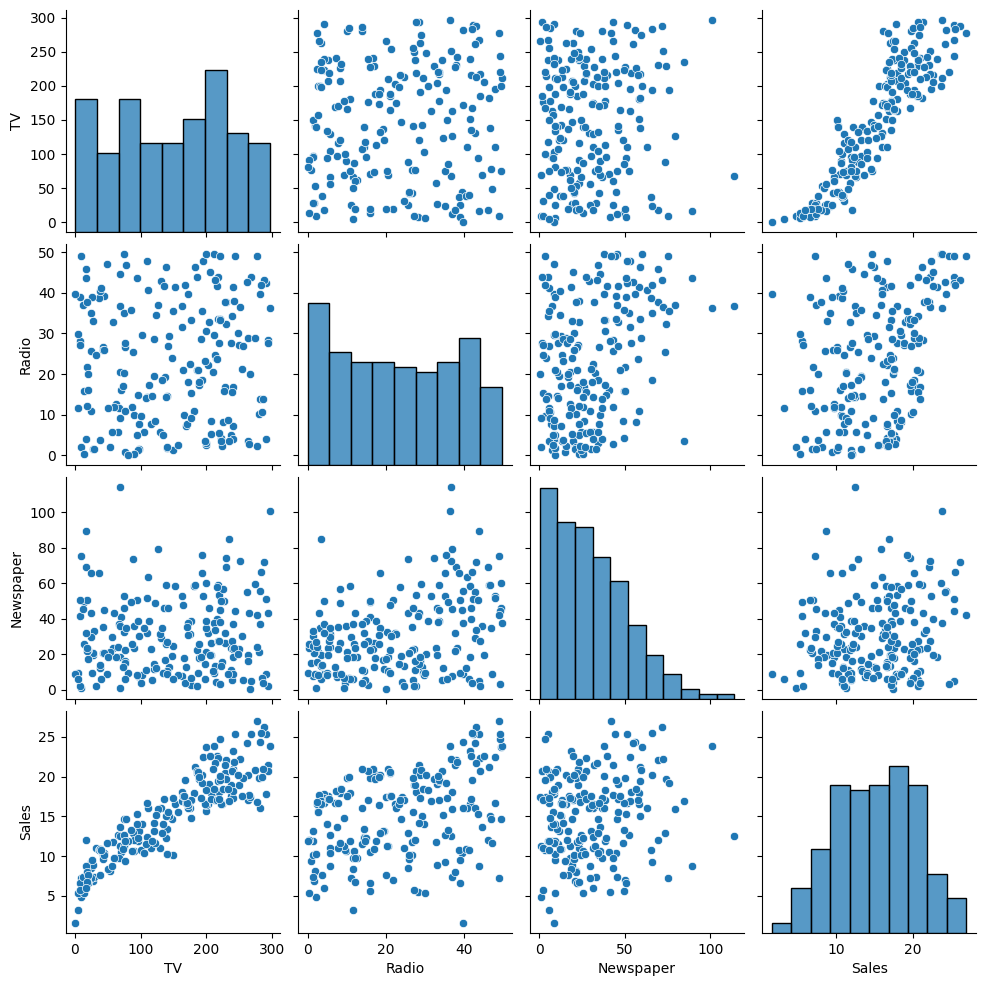

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)


In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_linear, mse_linear, rmse_linear = evaluate_model(y_test, y_pred_linear)
mae_poly, mse_poly, rmse_poly = evaluate_model(y_test, y_pred_poly)
mae_svr, mse_svr, rmse_svr = evaluate_model(y_test, y_pred_svr)

print("Linear Regression → MAE:", mae_linear, "MSE:", mse_linear, "RMSE:", rmse_linear)
print("Polynomial Regression → MAE:", mae_poly, "MSE:", mse_poly, "RMSE:", rmse_poly)
print("SVR → MAE:", mae_svr, "MSE:", mse_svr, "RMSE:", rmse_svr)


Linear Regression → MAE: 1.2748262109549338 MSE: 2.9077569102710896 RMSE: 1.7052146229349223
Polynomial Regression → MAE: 0.9033713382792442 MSE: 1.44254263690159 RMSE: 1.2010589647896517
SVR → MAE: 1.5553546442382153 MSE: 4.421034260847772 RMSE: 2.102625563634137


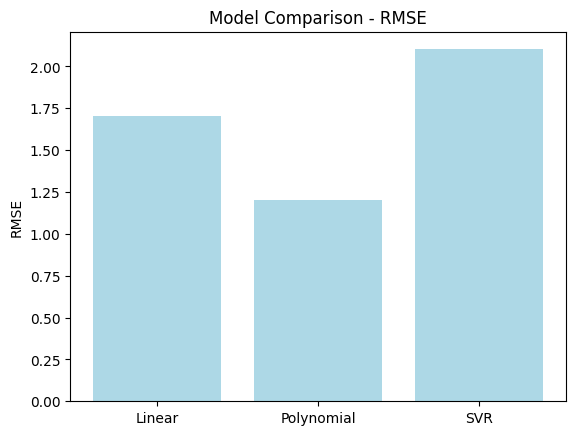

In [38]:
models = ['Linear', 'Polynomial', 'SVR']
rmse_values = [rmse_linear, rmse_poly, rmse_svr]

plt.bar(models, rmse_values, color='lightblue')
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.show()


In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)


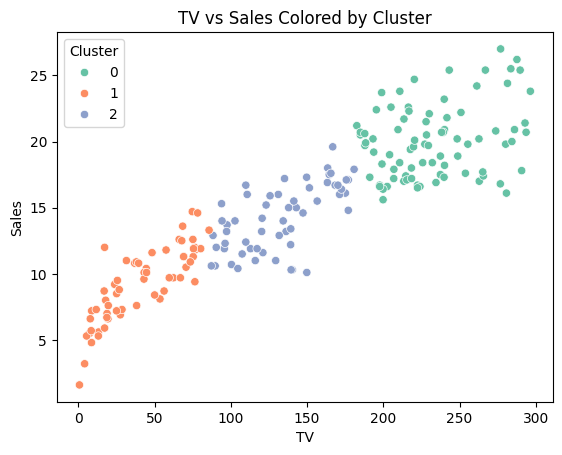

In [40]:
sns.scatterplot(x='TV', y='Sales', hue='Cluster', data=data, palette='Set2')
plt.title("TV vs Sales Colored by Cluster")
plt.show()
